# Proyecto Final - Series de Tiempo

### En el siguiente proyecto, se busca utilizar una nueva librería, Prophet, para hacer un análisis exhaustivo del flujo vehicular de la Ciudad de Buenos Aires. En este análisis, introduciremos el año 2020 e intentaremos mejorar el desempeño de nuestro modelo.
### Además, una conclusión del proyecto 3 fue que la estación Illia se estaba dejando de usar. Veremos ahora que no es así, sino que fue mutando la forma de pago

In [1]:
import matplotlib
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import fbprophet
from prophet import Prophet
sns.set()

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
data_2020 = pd.read_csv('flujo-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-2017.csv', sep =',')

---

Pequeño EDA del año 2020 

In [3]:
data_2020.shape

(2533743, 13)

In [4]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [5]:
data_2020.sample(15)

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
1281473,2020.0,2020-07-28,julio,Martes,28.0,7.0,8.0,AVELLANEDA,Moto,Tag,Tag - PosPago,Centro,18.0
2290331,2020.0,2020-11-20,noviembre,Viernes,20.0,0.0,1.0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,9.0
745062,2020.0,2020-04-16,abril,Jueves,16.0,6.0,7.0,ALBERDI,Auto,Tag,Tag - PosPago OCR,Centro,14.0
1974827,2020.0,2020-10-15,octubre,Jueves,15.0,14.0,15.0,ILLIA,Pesados 2 Ejes,Tag,Tag - PosPago,Provincia,45.0
2114936,2020.0,2020-11-18,noviembre,Miércoles,18.0,16.0,17.0,ILLIA,Auto,Efectivo,Efectivo,Centro,304.0
1343196,2020.0,2020-07-03,julio,Viernes,3.0,2.0,3.0,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 3 Ejes,Efectivo,Efectivo,Centro,1.0
45424,2020.0,2020-01-07 00:00:00,enero,Martes,7.0,13.0,14.0,ILP,Auto,Violación,Violación - Normal,Provincia,3.0
1162228,2020.0,2020-06-29,junio,Lunes,29.0,19.0,20.0,PB4,Pesados 4 Ejes,Violación,Violación - Normal,Centro,2.0
1878732,2020.0,2020-10-14,octubre,Miércoles,14.0,23.0,0.0,AVELLANEDA,Auto,Rec.Deuda,Paso en Infracción,Centro,10.0
2279836,2020.0,2020-11-30,noviembre,Lunes,30.0,18.0,19.0,PB4,Pesados 5 Ejes,Violación,Violación - Normal,Centro,1.0


In [6]:
data_2020.sample(10)
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


---

In [7]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_completo = pd.concat([data_2020, data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo y Telepase
estacion = ['Illia', 'ILLIA']
pago = ['EFECTIVO', 'TELEPASE', 'Efectivo', 'Tag']
ds_illia = dataset_completo[(dataset_completo.estacion.isin(estacion)) & (dataset_completo.forma_pago.isin(pago))]

#Quitamos las columnas que no vamos a utilizar
ds_illia.drop(columns = ['periodo','hora_inicio', 'estacion', 'dia_fecha', 'observacion'], inplace = True)

ds_illia.sample(10)

/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,mes,dia,hora_fin,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
663509,2017-06-26,NaN,Lunes,16.0,Pesado,TELEPASE,Provincia,1.0
1206446,2020-07-01,julio,Miércoles,13.0,Auto,Efectivo,Centro,301.0
111972,2018-01-30,NaN,Martes,19.0,Liviano,EFECTIVO,Provincia,1292.0
739142,2019-11-30,NaN,Sábado,14.0,Pesado,TELEPASE,Centro,39.0
1297812,2017-12-11,NaN,Lunes,3.0,Liviano,TELEPASE,Centro,64.0
142895,2017-02-07,NaN,Martes,21.0,Pesado,TELEPASE,Provincia,1.0
1149028,2018-11-01,NaN,Jueves,0.0,Pesado,TELEPASE,Provincia,20.0
1935460,2020-10-27,octubre,Martes,15.0,Moto,Tag,Provincia,40.0
434439,2018-04-25,NaN,Miércoles,1.0,Liviano,EFECTIVO,Provincia,236.0
58583,2017-01-16,NaN,Lunes,18.0,Pesado,EFECTIVO,Provincia,27.0


In [8]:
ds_illia.shape

(631693, 8)

In [9]:
efectivo = ['EFECTIVO', 'Efectivo']
telepase = ['TELEPASE', 'Tag']

In [10]:
#Separamos los dataset en las distintas formas de pago

In [11]:
ds_efectivo = ds_illia[(ds_illia.forma_pago.isin(efectivo))]

In [12]:
ds_telepase = ds_illia[(ds_illia.forma_pago.isin(telepase))]
ds_telepase.sample(20)

,fecha,mes,dia,hora_fin,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
331353,2017-03-29,NaN,Miércoles,20.0,Pesado,TELEPASE,Centro,9.0
1117419,2018-10-24,NaN,Miércoles,20.0,Pesado,TELEPASE,Provincia,3.0
535329,2017-05-23,NaN,Martes,8.0,Liviano,TELEPASE,Centro,2781.0
399495,2017-04-17,NaN,Lunes,9.0,Liviano,TELEPASE,Provincia,1160.0
796454,2018-08-01,NaN,Miércoles,13.0,Pesado,TELEPASE,Centro,42.0
1839996,2020-09-16,septiembre,Miércoles,14.0,Pesados 6 Ejes,Tag,Provincia,1.0
1026735,2018-10-01,NaN,Lunes,7.0,Pesado,TELEPASE,Centro,106.0
691930,2018-07-04,NaN,Miércoles,1.0,Pesado,TELEPASE,Provincia,1.0
385814,2017-04-13,NaN,Jueves,10.0,Pesado,TELEPASE,Provincia,2.0
456087,2017-05-02,NaN,Martes,6.0,Pesado,TELEPASE,Centro,30.0


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
ds_illia['Fecha2'] = pd.to_datetime(ds_illia.fecha) + pd.to_timedelta(ds_illia.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_illia.drop(columns=['fecha','hora_fin'], inplace = True)

ds_illia.head()

<ipython-input-13-bb844664e6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_illia['Fecha2'] = pd.to_datetime(ds_illia.fecha) + pd.to_timedelta(ds_illia.hora_fin, unit = 'h')
/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,Fecha2
52,enero,Miércoles,Auto,Efectivo,Centro,326.0,2020-01-01 01:00:00
53,enero,Miércoles,Auto,Efectivo,Provincia,319.0,2020-01-01 01:00:00
62,enero,Miércoles,Auto,Tag,Centro,205.0,2020-01-01 01:00:00
63,enero,Miércoles,Auto,Tag,Provincia,141.0,2020-01-01 01:00:00
64,enero,Miércoles,Auto,Tag,Centro,22.0,2020-01-01 01:00:00


In [14]:
#Hacemos lo mismo para los ds de efectivo y telepase
#Efectivo
ds_efectivo['Fecha2'] = pd.to_datetime(ds_efectivo.fecha) + pd.to_timedelta(ds_efectivo.hora_fin, unit = 'h')


ds_efectivo.drop(columns=['fecha','hora_fin'], inplace = True)

ds_efectivo.head()

#Telepase
ds_telepase['Fecha2'] = pd.to_datetime(ds_telepase.fecha) + pd.to_timedelta(ds_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

ds_telepase.head()

<ipython-input-14-8ad0d9515715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_efectivo['Fecha2'] = pd.to_datetime(ds_efectivo.fecha) + pd.to_timedelta(ds_efectivo.hora_fin, unit = 'h')
/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-14-8ad0d9515715>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,Fecha2
62,enero,Miércoles,Auto,Tag,Centro,205.0,2020-01-01 01:00:00
63,enero,Miércoles,Auto,Tag,Provincia,141.0,2020-01-01 01:00:00
64,enero,Miércoles,Auto,Tag,Centro,22.0,2020-01-01 01:00:00
65,enero,Miércoles,Auto,Tag,Provincia,131.0,2020-01-01 01:00:00
66,enero,Miércoles,Auto,Tag,Centro,8.0,2020-01-01 01:00:00


In [15]:
#Corregimos el nombre de fecha2 a fecha
ds_illia.rename(columns = {'Fecha2':'fecha'}, inplace = True) 

ds_efectivo.rename(columns = {'Fecha2':'fecha'}, inplace = True) 

ds_telepase.rename(columns = {'Fecha2':'fecha'}, inplace = True) 

/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
#Reordenamos el dataset por fecha
ds_illia.sort_values('fecha', inplace = True)
ds_illia.reset_index(drop=True, inplace = True)

ds_efectivo.sort_values('fecha', inplace = True)
ds_efectivo.reset_index(drop=True, inplace = True)

ds_telepase.sort_values('fecha', inplace = True)
ds_telepase.reset_index(drop=True, inplace = True)

<ipython-input-16-2df19bf6e684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_illia.sort_values('fecha', inplace = True)
<ipython-input-16-2df19bf6e684>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_efectivo.sort_values('fecha', inplace = True)
<ipython-input-16-2df19bf6e684>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_telepase.sort_values('fecha', inplace = True)


In [17]:
ds_illia.sample(3)

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
381178,NaN,Jueves,Liviano,TELEPASE,Centro,2050.0,2019-02-07 19:00:00
204292,NaN,Sábado,Liviano,EFECTIVO,Provincia,1239.0,2018-02-10 16:00:00
338936,NaN,Jueves,Pesado,EFECTIVO,Centro,48.0,2018-10-25 08:00:00


In [18]:
ds_efectivo.sample(3)

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
241191,enero,Domingo,Pesados 2 Ejes,Efectivo,Provincia,5.0,2020-01-12 09:00:00
275132,septiembre,Sábado,Auto con trailer,Efectivo,Provincia,1.0,2020-09-12 22:00:00
150393,NaN,Viernes,Pesado,EFECTIVO,Provincia,4.0,2018-06-15 16:00:00


In [19]:
ds_telepase.sample(3)

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
95374,NaN,Sábado,Pesado,TELEPASE,Provincia,1.0,2018-03-10 15:00:00
147397,NaN,Sábado,Pesado,TELEPASE,Centro,2.0,2018-10-06 17:00:00
188450,NaN,Martes,Liviano,TELEPASE,Centro,304.0,2019-07-16 00:00:00


#### A continuación, mostraremos tendencias con un resampleo mensual; y luego haremos lo mismo pero separando vehículos livianos y pesados, y ademas en dos metodos de pago: efectivo y telepase.

In [20]:
ventana = int(365*2/53)

In [21]:
#Resampleamos nuestros datos para agrupar por mes
month_illia = ds_illia.resample('M', on = 'fecha').sum()
print(month_illia.shape)
month_illia.head(5)

(48, 1)


,cantidad_pasos
fecha,
2017-01-31,2579369.0
2017-02-28,2307278.0
2017-03-31,2652278.0
2017-04-30,2492088.0
2017-05-31,2642048.0


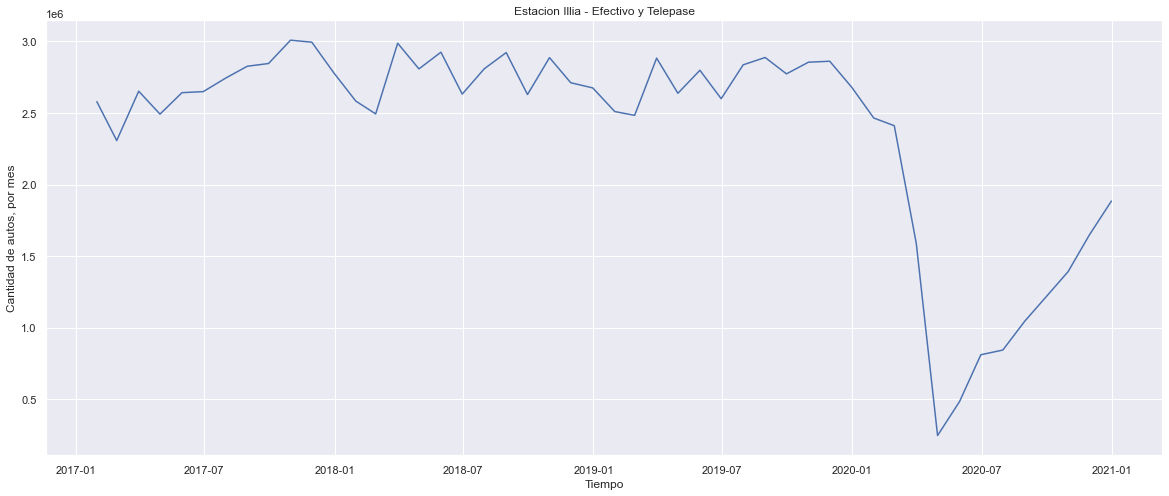

In [22]:
plt.figure(figsize = (20,8))
plt.plot(month_illia.index, month_illia.cantidad_pasos)
plt.title('Estacion Illia - Efectivo y Telepase')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Si bien se observa una caida abrupta en el 2020, el grafico no nos dice mucho. Por eso a continuación haremos el promedio

In [23]:
month_average_trend = month_illia.rolling(window=ventana, center = True).mean()

In [24]:
plt.style.use('fivethirtyeight')

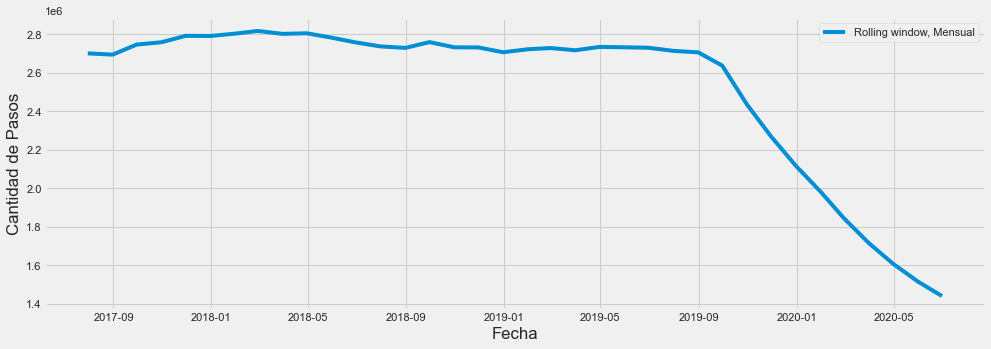

In [25]:
plt.figure(figsize = (15,5))
plt.plot(month_average_trend, lw=4, label = 'Rolling window, Mensual')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

##### En el proyecto 3, cuando analizamos los dos métodos de pago juntos, marcaba una clara tendencia negativa, lo que nos llevo a concluir que la estación se estaba dejando de usar. Ahora, incluyendo el método de pago de telepase, vemos que en realidad la estación Illia no se está dejando de usar, sino que se ha mantenido su flujo vehicular hasta Setiembre de 2019, donde cae abruptamente. Investigaremos mas adelante el por qué.

---

Ahora separemos por efectivo y por telepase y veamos que ocurre

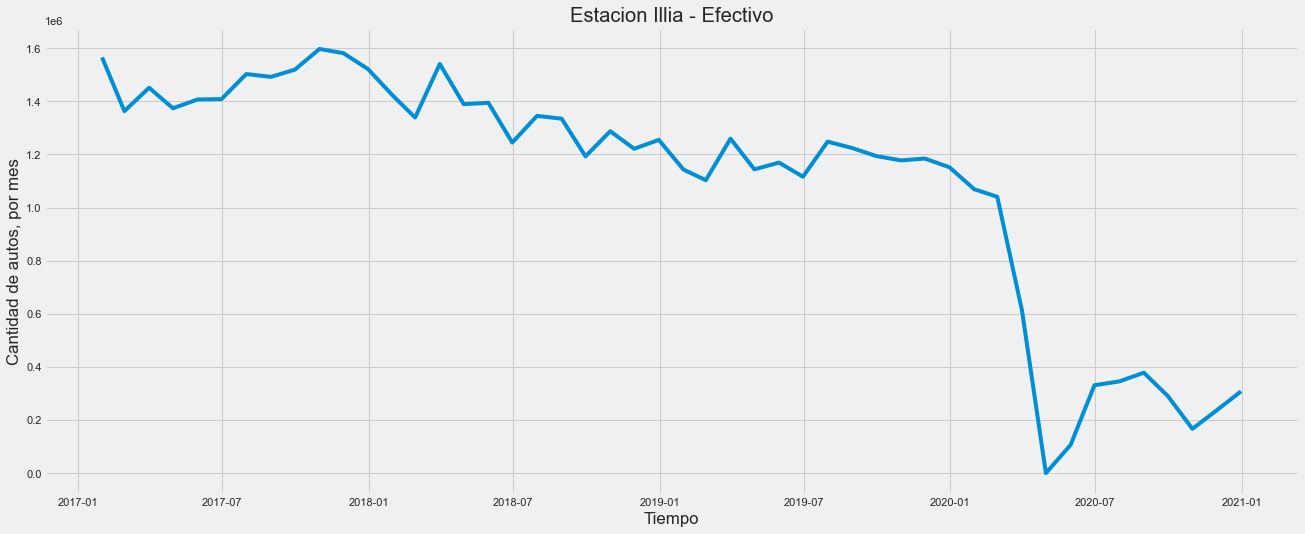

In [26]:
month_efectivo = ds_efectivo.resample('M', on = 'fecha').sum()

plt.figure(figsize = (20,8))
plt.plot(month_efectivo.index, month_efectivo.cantidad_pasos)
plt.title('Estacion Illia - Efectivo')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

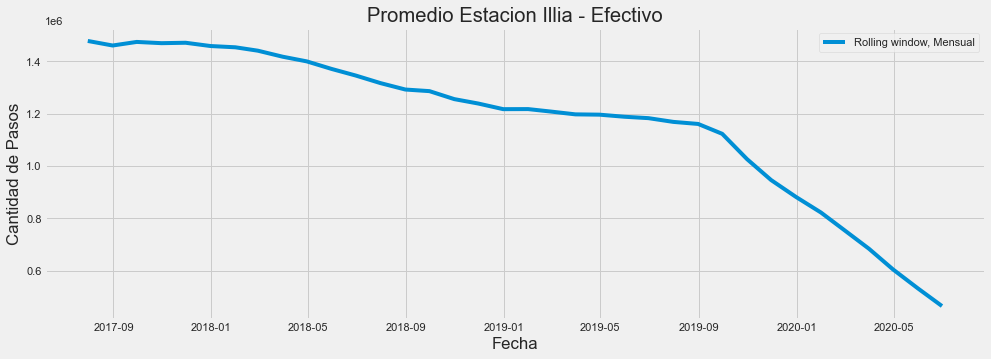

In [27]:
month_efectivo_average_trend = month_efectivo.rolling(window=ventana, center = True).mean()

plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,5))
plt.plot(month_efectivo_average_trend, lw=4, label = 'Rolling window, Mensual')
plt.title('Promedio Estacion Illia - Efectivo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

##### El gráfico anterior refleja que el flujo vehicular viene con una tendencia negativa para este metodo de pago en particular, y afirmando de forma erronea en el proyecto 3 que la estación se está dejando de usar.

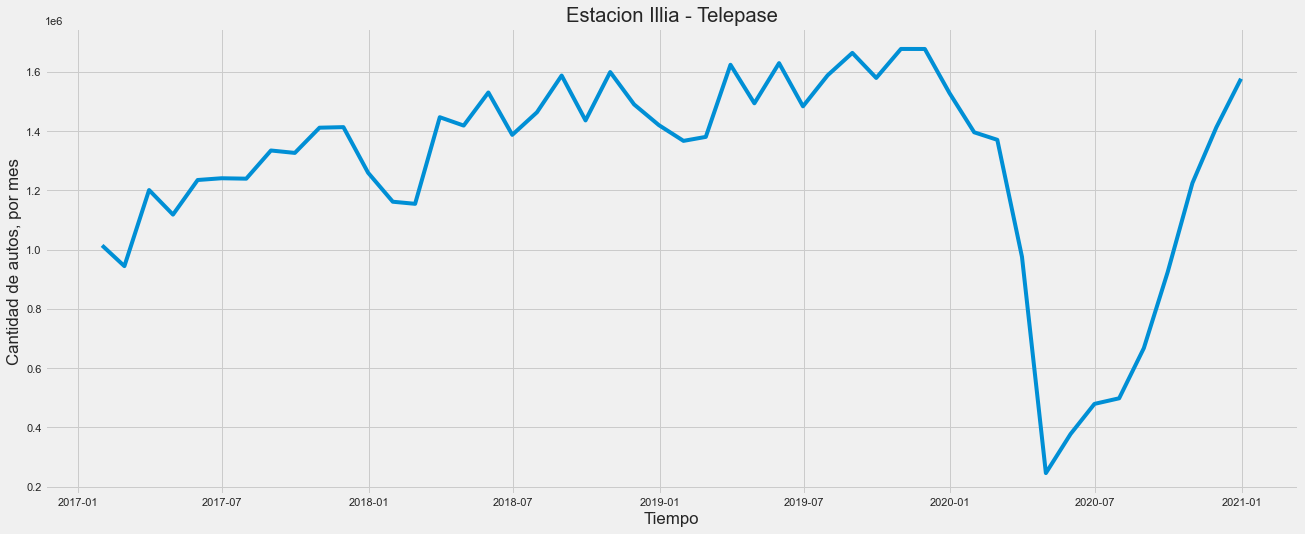

In [28]:
month_telepase = ds_telepase.resample('M', on = 'fecha').sum()

plt.figure(figsize = (20,8))
plt.plot(month_telepase.index, month_telepase.cantidad_pasos)
plt.title('Estacion Illia - Telepase')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

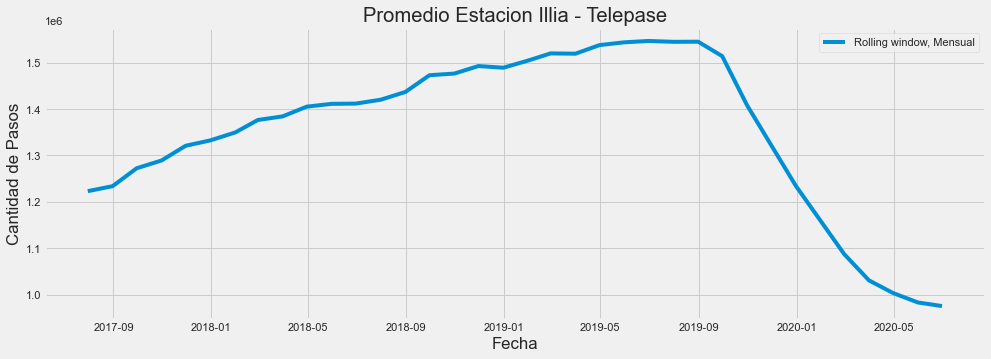

In [29]:
month_telepase_average_trend = month_telepase.rolling(window=ventana, center = True).mean()

plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,5))
plt.plot(month_telepase_average_trend, lw=4, label = 'Rolling window, Mensual')
plt.title('Promedio Estacion Illia - Telepase')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

##### Sin embargo, al ver el gráfico de telepase, y junto con el primer gráfico donde se encuentran juntos las dos formas de pago, confirmamos que la estación no se está dejando de usar, sino que la gente ha optado por pagar con telepase y no con efectivo u otros métodos de pago. A continuación dejo un link que justifica este comportamiento: durante los años 2017 y 2018 se comenzaron a otorgar promociones para quienes usen telepase para fomentar su uso. Finalmente en 2020 se declara obligatorio

https://aubasa.com.ar/aubasa-suma-importantes-beneficios-para-usuarios-de-telepase/
https://www.buenosaires.gob.ar/jefaturadegabinete/movilidad/noticias/por-el-alto-numero-de-adhesiones-diarias-habra-tiempo-hasta-el

-----

Ahora separemos por tipo de vehiculo

In [30]:
liv = ['Liviano', 'Auto' ,'Auto con trailer', 'Moto' 'N/D' ,'Pago Doble Auto',
 'Pago Doble Auto con trailer / Pesado 2 Ejes', 'Pago doble Moto']
pes = ['Pesado', 'Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes', 'Pesados 5 Ejes',
 'Pesados 6 Ejes']

In [31]:
livianos = ds_illia[ds_illia.tipo_vehiculo.isin(liv)]
pesados = ds_illia[ds_illia.tipo_vehiculo.isin(pes)]

In [32]:
week_liviano = livianos.resample('M', on = 'fecha').sum()
week_pesado = pesados.resample('M', on = 'fecha').sum()

In [33]:
week_average_trend_liviano = week_liviano.rolling(window=ventana, center = True).mean()
week_average_trend_pesado = week_pesado.rolling(window=ventana, center = True).mean()

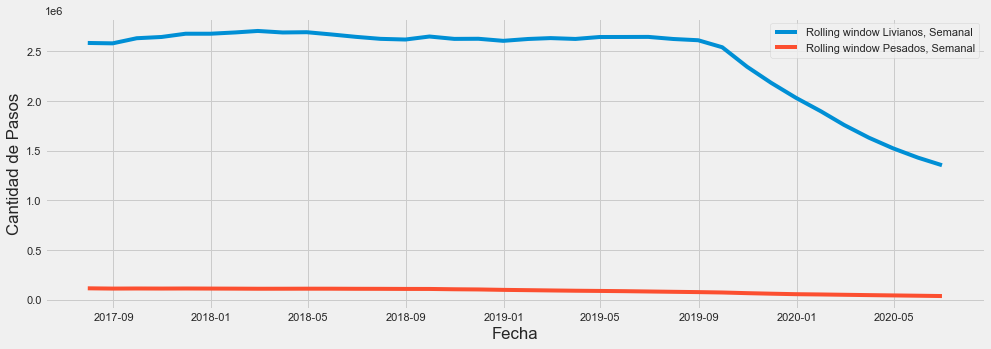

In [34]:
plt.figure(figsize = (15,5))
plt.plot(week_average_trend_liviano, lw=4, label = 'Rolling window Livianos, Semanal')
plt.plot(week_average_trend_pesado, lw=4, label = 'Rolling window Pesados, Semanal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Observamos que para vehiculos pesados, existe una tendencia negativa, tendiendo a cero. Para vehiculos livianos el flujo es constante hasta Setiembre de 2019, donde el flujo a caer marcando una tendencia negativa.

Generaremos otro DS con todos los metodos de pago, para ver como se comporta

---

#### Procedemos a hacer la descomposion de la serie en sus tres componentes: Tendencia, Estacionalidad y Ruido

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

descompose_efectivo = seasonal_decompose(month_efectivo, model='additive')
descompose_telepase = seasonal_decompose(month_telepase, model='additive')

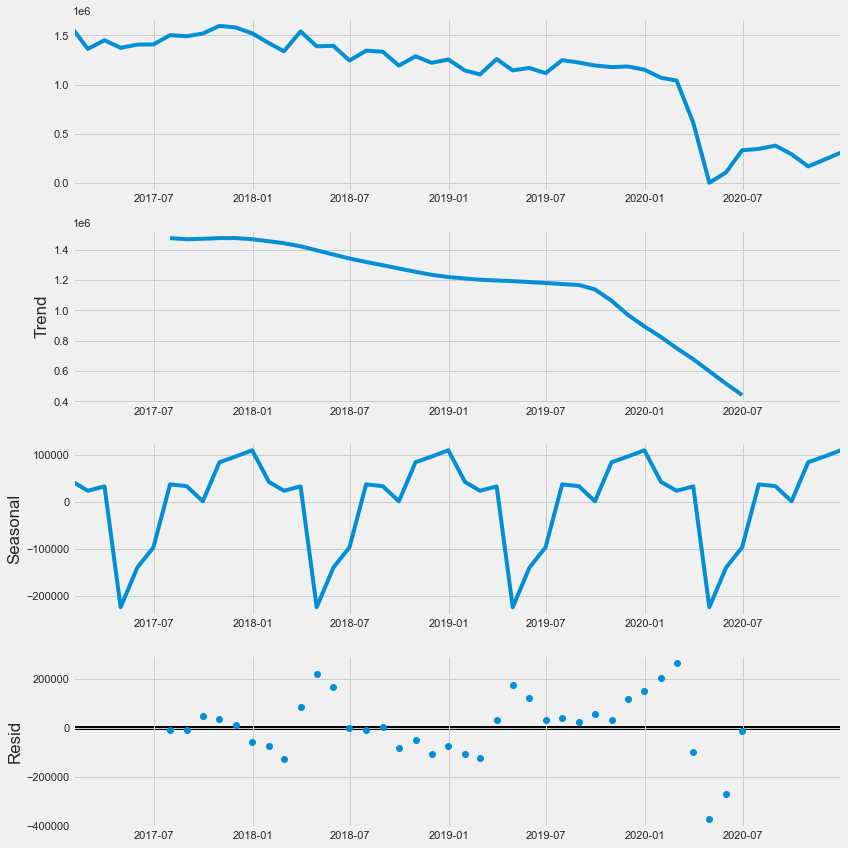

In [36]:
matplotlib.rcParams['figure.figsize'] = [12,12]
descompose_efectivo.plot()
plt.show()

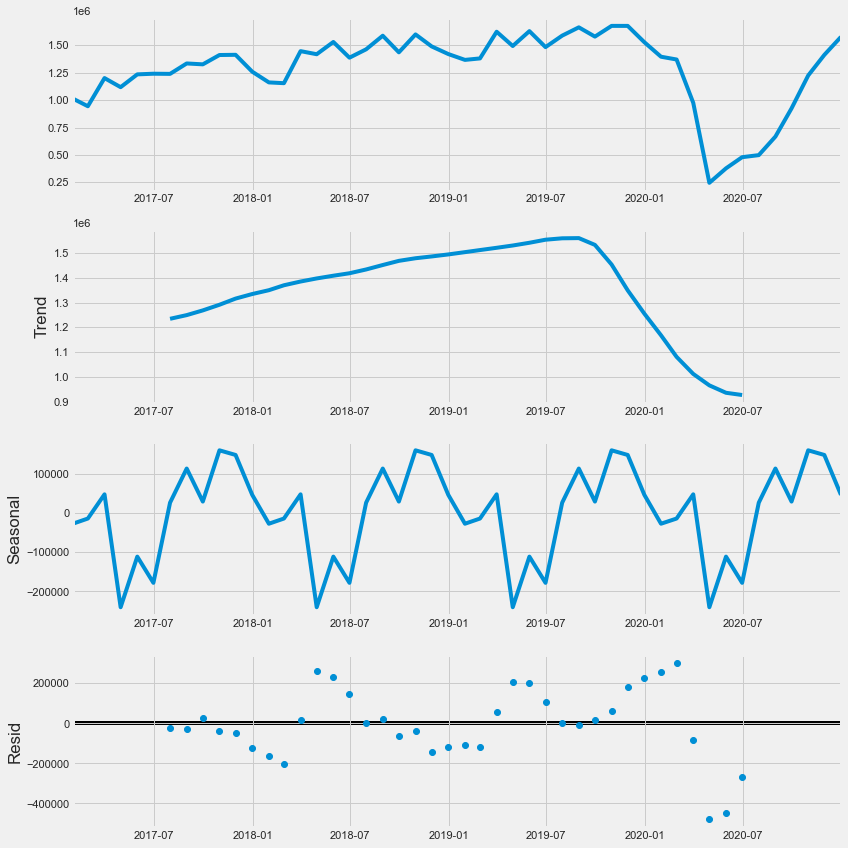

In [37]:
matplotlib.rcParams['figure.figsize'] = [12,12]
descompose_telepase.plot()
plt.show()

Algo notorio es que el residual de ambas series son muy parecidas, lo que nos dice que existe algo intrinseco entre ambas.

Ademas, existe una estacionalidad marcada, con una tendencia positiva desde Mayo hasta Octubre/Noviembre, y luego una tendencia negativa desde Octubre/Noviembre hasta Mayo nuevamente

--------

# Prophet

### Usaremos esta libreria para desarrollar nuestro modelo de prediccion

Elegi Prophet porque es una de las más conocidas y poderosas en series de tiempo, desarrollada por Facebook. Ademas para desarrollar nuestro modelo, elegi el dataset completo de toda la estacion Illia, con todos sus metodos de pago

In [38]:
from prophet import Prophet

In [39]:
m = Prophet()

In [40]:
ds_illia.sample(3)

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
349259,NaN,Martes,Pesado,EFECTIVO,Centro,3.0,2018-11-13 04:00:00
128238,NaN,Viernes,Pesado,EFECTIVO,Provincia,2.0,2017-09-08 17:00:00
534775,julio,Domingo,Auto,Tag,Centro,20.0,2020-07-05 05:00:00


In [41]:
illia_prophet = ds_illia.copy()

In [42]:
illia_prophet.sample(2)

,mes,dia,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
117545,NaN,Jueves,Liviano,EFECTIVO,Provincia,105.0,2017-08-17 04:00:00
441148,NaN,Jueves,Pesado,EFECTIVO,Centro,24.0,2019-12-19 16:00:00


In [43]:
illia_prophet.shape

(631693, 7)

In [44]:
illia_prophet.drop(columns= {'mes','dia', 'tipo_vehiculo', 'forma_pago', 'sentido'}, inplace=True)

In [45]:
illia_prophet.sample(3)

,cantidad_pasos,fecha
629417,3.0,2020-12-28 00:00:00
561910,2.0,2020-08-26 17:00:00
114796,8.0,2017-08-11 05:00:00


In [46]:
month_ds_illia = illia_prophet.resample('M', on = 'fecha').sum()
print(month_ds_illia.shape)
month_ds_illia.head(5)

(48, 1)


,cantidad_pasos
fecha,
2017-01-31,2579369.0
2017-02-28,2307278.0
2017-03-31,2652278.0
2017-04-30,2492088.0
2017-05-31,2642048.0


In [47]:
month_ds_illia["fecha"]= month_ds_illia.index
print(month_ds_illia.shape)

(48, 2)


In [48]:
month_ds_illia.head(5)

,cantidad_pasos,fecha
fecha,,
2017-01-31,2579369.0,2017-01-31
2017-02-28,2307278.0,2017-02-28
2017-03-31,2652278.0,2017-03-31
2017-04-30,2492088.0,2017-04-30
2017-05-31,2642048.0,2017-05-31


In [49]:
month_ds_illia.rename(columns = {'fecha':'ds'}, inplace = True) 
month_ds_illia.rename(columns = {'cantidad_pasos':'y'}, inplace = True) 

In [50]:
m.fit(month_ds_illia)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods=59)
future.tail()

,ds
102,2021-02-24
103,2021-02-25
104,2021-02-26
105,2021-02-27
106,2021-02-28


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2021-02-24,-3.470434e+06,-4.092931e+06,-2.880432e+06
103,2021-02-25,-2.280119e+06,-2.885364e+06,-1.629791e+06
104,2021-02-26,-1.040537e+06,-1.633133e+06,-4.306424e+05
105,2021-02-27,2.265557e+05,-4.132300e+05,8.568884e+05
106,2021-02-28,1.498780e+06,9.258256e+05,2.156021e+06


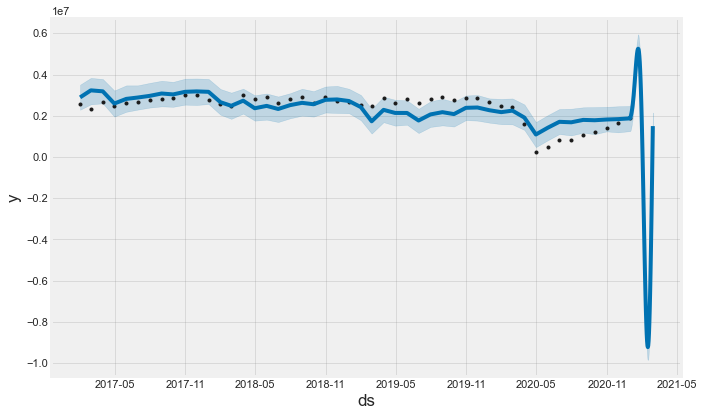

In [53]:
fig1 = m.plot(forecast)

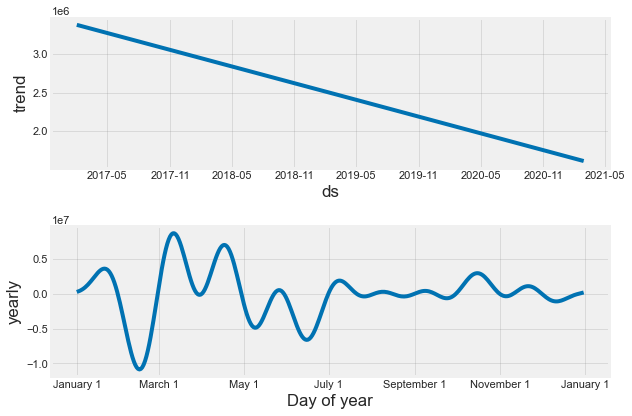

In [54]:
fig2 = m.plot_components(forecast)

In [55]:
from fbprophet.diagnostics import performance_metrics

In [56]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-07-05 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-07-31,2.663298e+06,2.596906e+06,2.729402e+06,2836688.0,2019-07-05
1,2019-08-31,2.946666e+06,2.884446e+06,3.012990e+06,2887937.0,2019-07-05
2,2019-09-30,2.478183e+06,2.413345e+06,2.546582e+06,2773429.0,2019-07-05
3,2019-10-31,2.938298e+06,2.865960e+06,3.005147e+06,2854922.0,2019-07-05
4,2019-11-30,2.650742e+06,2.580044e+06,2.724878e+06,2861737.0,2019-07-05


In [57]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,1.782585e+10,133513.484661,124070.368736,0.045724,0.045724,0.0
1,57 days,4.518393e+09,67218.994958,66739.902915,0.025330,0.025330,0.5
2,59 days,2.518730e+09,50186.953030,49291.709241,0.018433,0.018433,1.0
3,87 days,4.437934e+10,210664.040057,167550.404264,0.061493,0.061493,0.5
4,90 days,7.064016e+11,840477.036566,723303.755643,0.415779,0.415779,0.0


Mientras que en el proyecto 3 teniamos un RMSE de 656.100, observamos que para nuestro nuevo modelo con Prophet mejora considerablemente para 30, 57 y 59 días

---------

#### Desde ya, quería agradecer a todo Acamica por estos meses de aprendizaje. Fueron 7 meses excelentes, con increíbles profesores y compañeros. En todo momento me sentí acompañado, y la predisposición de parte de los profesores siempre fue la mejor. La organización del curso también fue óptima. 


### Muchas gracias por todo!